# Decision Tree Tutorial

## Overview

Decision Tree is an algorithm that belongs to the supervised learning algorithms. It used for both classification and regression problems. The idea behind ecision tree is to create training model that can predict class(single or multi) or value by learning simple decision rules from training data. It works by recursively partitioning the data into subsets based on the values of the input features. Then a decision rule is applied to assign a label to the data at each step. The final result is a tree model that makes predictions on new data. 

Just like flowchart below, decision tree contains different types of nodes and branches. Every decision node represent the test on feature and based on the test result it will either form another branch or the leaf node. Every branch represents the decision rule and leaf node represent the final outcome.

![Decision_Tree_Flowchart](Decision_Tree.png)

**Types of decision tree:**
* ***Classification decision trees*** - In this kind if decision trees, the decision variable is categorical.
* ***Regression decision trees*** - In this kind of decision trees, the decision variable is continous.

## Critiria To Split The Data

The objective of decision tree is to split the data in such a way that at the ned we have different groups of data which has more similarity and less randomness/impurity. In order to achieve this, every split in decision tree must reduce the randomness. Decision tree uses ***entroty*** ir ***gini*** selection critiria to split the data.

Note: for this tutorial, we are going to use sklearn library to test ***classification*** and ***regression***. 'entropy' or 'gini' critiria for classifier whereas ***mse***, ***friedman_mse***, and ***mae*** are selection critiria for regressor.

### Entropy

In order to find the best feature which will reduce the randomness after a split, we can compare the randomness before and after the split for every feature. In the end we choose the feature which will provide the highest reduction in randomness. Formally randomness in data is known as 'Entropy' and difference between the 'Entropy' before and after split is known as 'Information Gain'.

![entropy formula](entropy_formula.png)

So, in the case of ***Entropy***, decision tree will split the data using the features that provides the highest information gain.


### Gini

In case of gini impurity, we pick a random data point in our dataset. Then randomly classify it according to the class distribution in the dataset. So it becomes very important to know the accuracy of this random classification. Gini impurity gives us the probability of incorrect classification. We’ll determine the quality of the split by weighting the impurity of each branch by how many elements it has. Resulting value is called as 'Gini Gain' or 'Gini Index'. This is what’s used to pick the best split in a decision tree. Higher the Gini Gain, better the split


![gini formula](gini_formula.png)

Sp, in the case of ***Gini***, decision tree will split the data using the features that provides the highest gini gain.

## Classification Problem Example: IRIS dataset

For classification exercise we are going to use sklearns iris plant dataset. Objective is to classify iris flowers among three species (setosa, versicolor or virginica) from measurements of length and width of sepals and petals.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Visualizing Iris data

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

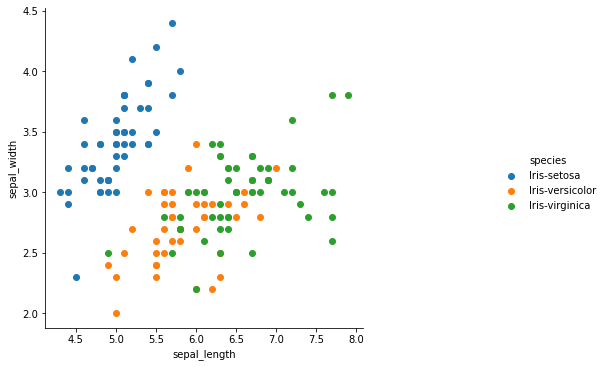

In [7]:
# Visualize the dataset based (speal lengh and speal width) and the target variable which is the type
sns.FacetGrid(df,hue="species").map(plt.scatter,'sepal_length','sepal_width').add_legend()
plt.gcf().set_size_inches(10,6)
plt.show()

***Observation***

Blueprints(Iris-setosa) are separated perfectly as compared to yellowprints(Iris-virginica) and orangeprints(Iris-versicolor) for features 'Sepal_length' and 'Sepal_width'

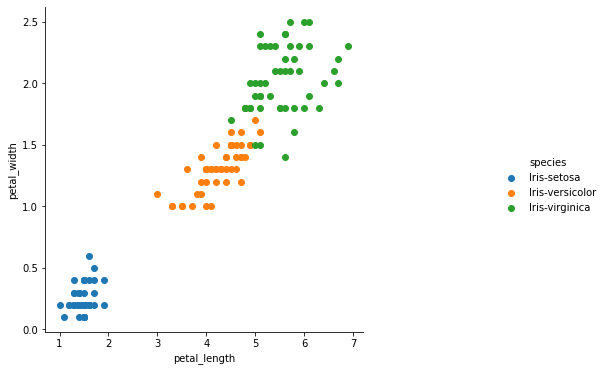

In [9]:
# Visualize the dataset based (petal lengh and petal width) and the target variable which is the type
sns.FacetGrid(df,hue="species").map(plt.scatter,'petal_length','petal_width').add_legend()
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(10,6)
plt.show()

***Obseravtion***

In both cases blueprints(Iris-setosa) are perfectly separated as compared to other labels

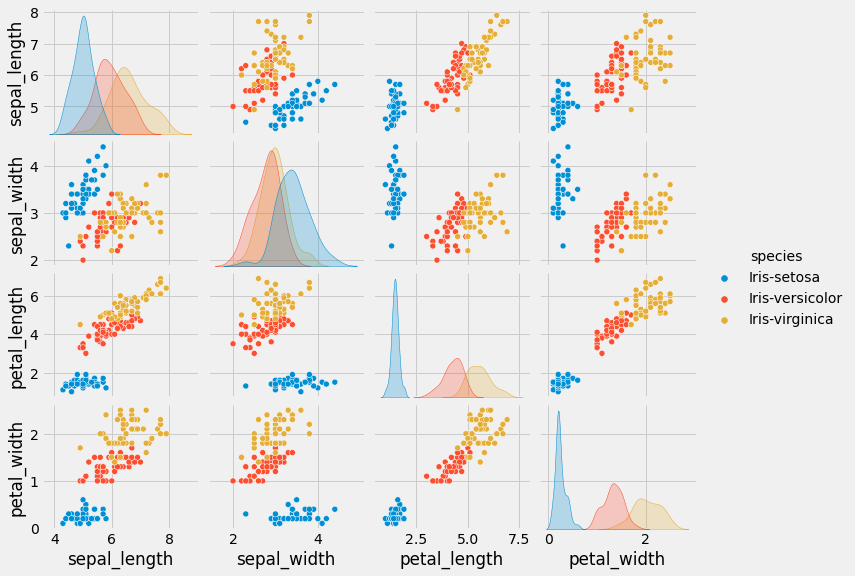

In [10]:
# Visualize different feature of the dataset and the target variable
sns.pairplot(df,hue='species')
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,8)
plt.show()

### Build Machine Learning Model

In [17]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])

df['species'].unique()

array([0, 1, 2])

In [18]:
#Lets create feature matrix X  and y labels
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['species']]

print('X shape=',X.shape)
print('y shape=',y.shape)

X shape= (150, 4)
y shape= (150, 1)


### Split the dataset into training and testing
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
* We will keep 20% of data for testing and 80% of data for training the model

In [19]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_train dimension=  (30, 1)


In [22]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


### Using entropy attribute selector

REPORT: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



C:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


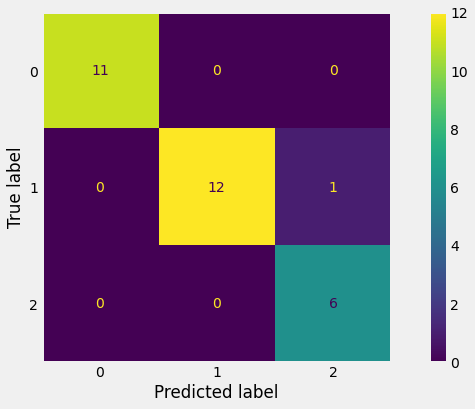

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
clf= tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
dtc=accuracy_score(pred,y_test);
print("REPORT: ")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
plot_confusion_matrix(clf,X_test,y_test)
plt.grid(False)
plt.gcf().set_size_inches(12,6)

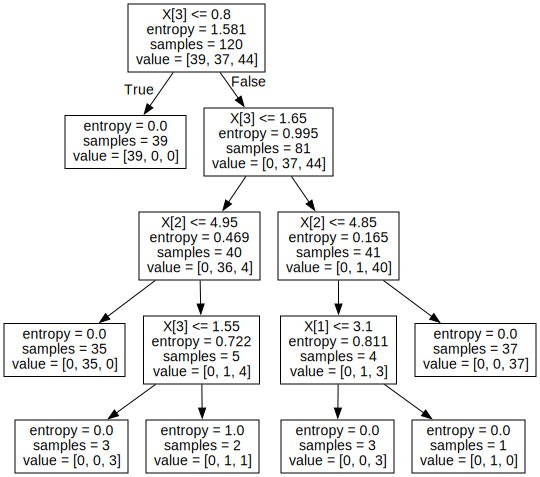

In [31]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph

### Using gini attribute selector

REPORT: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



C:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


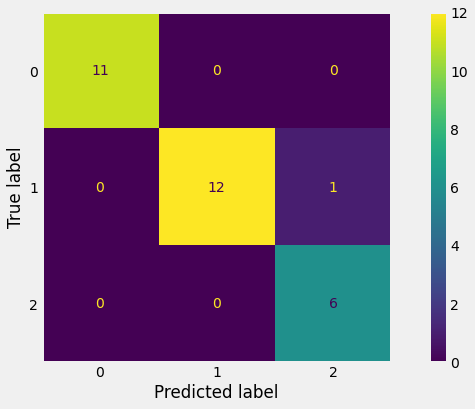

In [33]:
clf= tree.DecisionTreeClassifier(criterion="gini", max_depth=4)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
dtc=accuracy_score(pred,y_test);
print("REPORT: ")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
plot_confusion_matrix(clf,X_test,y_test)
plt.grid(False)
plt.gcf().set_size_inches(12,6)

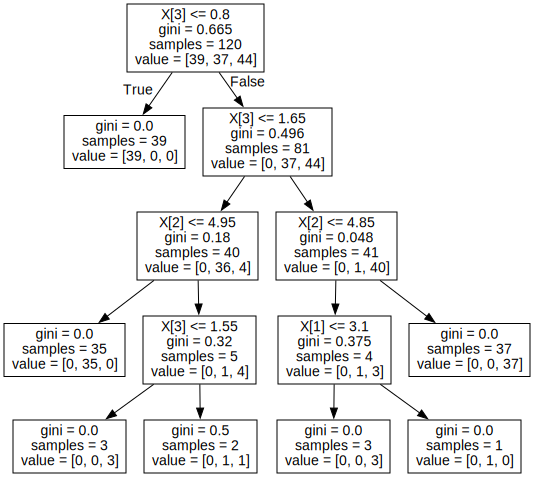

In [34]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph

## Regression Classifier:

For regression exercise we are going to use sklearns Boston house prices dataset Objective is to predict house price based on available data

### Understanding the Boston house dataset

* boston.DESCR > Complete description of dataset
* boston.data > Data to learn. There are 13 features, Median Value (attribute 14) is usually the target. Total 506 training sets
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per USD 10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in USD 1000's
* boston.feature_names > Array of all 13 features ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
* boston.filename > CSV file name
* boston.target > The price valueis in $1000’s
From above details its clear that X = 'boston.data' and y= 'boston.target'